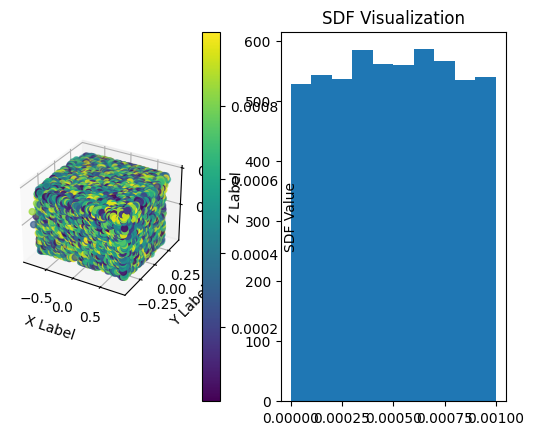

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# from mesh_to_sdf import get_surface_point_cloud,scale_to_unit_cube, scale_to_unit_sphere, BadMeshException, sample_sdf_near_surface

def vis_sdf(data, sdf_threshold=0.01):
    # 获取xyz坐标和sdf值
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    sdf_values = data[:, 3]

    threshold = sdf_threshold

    x = x[sdf_values<threshold]
    y = y[sdf_values<threshold]
    z = z[sdf_values<threshold]

    sdf_values = sdf_values[sdf_values<threshold]

    # 创建一个新的3D图形
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    ax2.hist(sdf_values)

    # 使用SDF值作为颜色映射
    scatter = ax.scatter(x, y, z, c=sdf_values, cmap='viridis')
    plt.colorbar(scatter, ax=ax, label='SDF Value')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title('SDF Visualization')
    plt.show()

raw = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/1b0432fd7b56f7e219fb4103277a6b93_scene0166_01_ins_7.npz")
data = raw['pos']
sdf_threshold=0.001
vis_sdf(data,sdf_threshold)

(array([  6703.,  93522.,  51599.,  51645.,  50148.,  62882.,  91615.,
         74287., 168253.,  54346.]),
 array([-0.240767 , -0.1969007, -0.1530344, -0.1091681, -0.0653018,
        -0.0214355,  0.0224308,  0.0662971,  0.1101634,  0.1540297,
         0.197896 ]),
 <BarContainer object of 10 artists>)

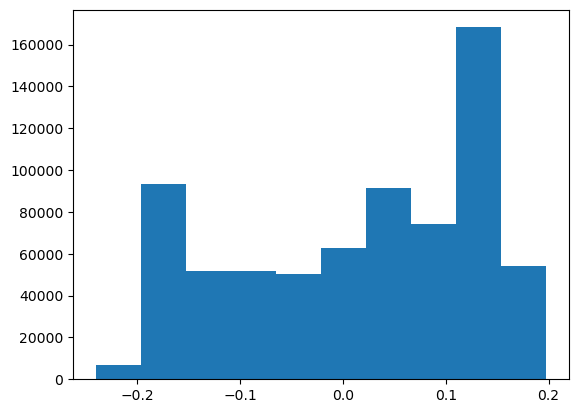

In [11]:
# raw = np.loadtxt("/home/wiss/lhao/storage/user/hjp/ws_dditnach/gensdf/data/preprocessing/grid.csv",delimiter=",") # [-1.1]
raw = np.loadtxt("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/data/canonical_mesh_manifoldplus/04256520/1a4a8592046253ab5ff61a3a2a0e2484_scene0484_00_ins_1.csv",delimiter=",")
plt.hist(raw[:,2])

In [2]:
def get_mesh(sdf_path):
    mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus"
    import os
    instance_name = os.path.basename(sdf_path).split(".")[0]
    class_id = sdf_path.split("/")[-2]
    mesh_path = os.path.join(mesh_root,class_id,instance_name,"model_canonical_manifoldplus.obj")
    return mesh_path

get_mesh("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origpreprocess/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.ply")

'/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7/model_canonical_manifoldplus.obj'

In [ ]:
"""

比较DeepSDF原版生成到sdf采样数据和真实mesh的尺度差距

"""

import plotly.graph_objs as go
from plyfile import PlyData
import numpy as np

def get_mesh(sdf_path):
    mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus"
    import os
    instance_name = os.path.basename(sdf_path).split(".")[0]
    class_id = sdf_path.split("/")[-2]
    mesh_path = os.path.join(mesh_root,class_id,instance_name,"model_canonical_manifoldplus.obj")
    return mesh_path

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/data/SdfSamples/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.npz"
mesh_path =  "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origpreprocess/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.ply"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13/model_canonical_manifoldplus.obj"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples_new/sofas_dit/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13.ply"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/ShapeNet_manifoldplus/04379243/10139657dfa9afe0c3bd24f986301745.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ShapeNet_manifoldplus/04379243/10139657dfa9afe0c3bd24f986301745.obj"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2/model_canonical_manifoldplus.obj"

RESCALE=True

def mesh_load(mesh_path):
    # 从文件加载网格数据
    file_suffix = mesh_path.split(".")[-1]
    if file_suffix == "obj":
        with open(mesh_path, 'r') as file:
            lines = file.readlines()

        vertices = []
        faces = []

        for line in lines:
            if line.startswith('v '):
                vertex = line.split()[1:]
                vertices.append([float(vertex[0]), float(vertex[1]), float(vertex[2])])
            elif line.startswith('f '):
                face = line.split()[1:]
                face_indices = [int(idx.split('/')[0]) - 1 for idx in face]
                faces.append(face_indices)

        mesh = go.Mesh3d(x=[v[0] for v in vertices], y=[v[1] for v in vertices], z=[v[2] for v in vertices],
                        i=[f[0] for f in faces], j=[f[1] for f in faces], k=[f[2] for f in faces], name="gt mesh")
        return mesh

    elif file_suffix == "ply":
        from plyfile import PlyData

        # 从PLY文件加载网格数据
        plydata = PlyData.read(mesh_path)

        # 提取顶点坐标
        vertices = np.array([list(vertex) for vertex in plydata['vertex'].data])

        # 提取面数据
        faces = np.array(plydata['face'].data['vertex_indices'])
        faces = np.array([list(row) for row in faces])

        # 创建网格图形对象
        mesh = go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], i=faces[:, 0], j=faces[:, 1], k=faces[:, 2], name="recon mesh")
    
        return mesh

mesh = mesh_load(mesh_path)

#加载SDF值
raw = np.load(sdf_path)
data = raw['pos']
print(raw['scale_mesh2sdf'])
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
sdf_values = data[:, 3]

threshold = 0.0005


if not RESCALE:
    x = x[sdf_values<threshold]
    y = y[sdf_values<threshold]
    z = z[sdf_values<threshold]
else:
    x = x[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
    y = y[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
    z = z[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="sdf samples")
layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[trace,mesh], layout=layout)
fig.show()

In [10]:
import numpy as np

raw = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/7c9e1876b1643e93f9377e1922a21892_scene0329_01_ins_4.npz")
print(raw.files)
print(raw['scale_mesh2sdf'])
print(raw['translation_mesh2sdf'])
"".join([chr(n) for n in raw['mesh_filename']])


['pos', 'neg', 'translation_mesh2sdf', 'scale_mesh2sdf', 'mesh_filename']
[0.877599]
[-0.00372851  0.029984   -0.01235551]


'DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/7c9e1876b1643e93f9377e1922a21892_scene0329_01_ins_4/model_canonical_manifoldplus.obj'

# 清洗python版本和DeepSDF版本数据

In [1]:
import os
import numpy as np
import pdb
import plotly.graph_objs as go

def mesh_load(mesh_path, opacity=0.5, scale=None, translation=None):
    # 从文件加载网格数据
    file_suffix = mesh_path.split(".")[-1]
    if file_suffix == "obj":
        with open(mesh_path, 'r') as file:
            lines = file.readlines()

        vertices = []
        faces = []

        for line in lines:
            if line.startswith('v '):
                vertex = line.split()[1:]
                vertices.append([float(vertex[0]), float(vertex[1]), float(vertex[2])])
            elif line.startswith('f '):
                face = line.split()[1:]
                face_indices = [int(idx.split('/')[0]) - 1 for idx in face]
                faces.append(face_indices)

        mesh = go.Mesh3d(x=[v[0] for v in vertices], y=[v[1] for v in vertices], z=[v[2] for v in vertices],
                        i=[f[0] for f in faces], j=[f[1] for f in faces], k=[f[2] for f in faces], name="gt mesh",opacity=opacity)
        return mesh

    elif file_suffix == "ply":
        from plyfile import PlyData

        # 从PLY文件加载网格数据
        plydata = PlyData.read(mesh_path)

        # 提取顶点坐标
        vertices = np.array([list(vertex) for vertex in plydata['vertex'].data])

        # 提取面数据
        faces = np.array(plydata['face'].data['vertex_indices'])
        faces = np.array([list(row) for row in faces])

        # 创建网格图形对象
        mesh = go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], i=faces[:, 0], j=faces[:, 1], k=faces[:, 2], name="recon mesh",opacity=0.5)
    
        return mesh

# 指定文件夹路径
sdf_folder_path = '/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW_new/ScanARCW/sdf_samples/04256520'
mg_sdf_folder_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW/sdf_samples/04256520"

mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW_new/ScanARCW/canonical_mesh/04256520"

# 获取文件夹中的所有文件及其大小
files_with_size = [(file, os.path.getsize(os.path.join(sdf_folder_path, file))) for file in os.listdir(sdf_folder_path) if os.path.isfile(os.path.join(sdf_folder_path, file))]

# 按照文件大小排序
sorted_files = sorted(files_with_size, key=lambda x: x[1])

small_list = dict([])
big_list = dict([])

threshold = 5275883

# 打印排序后的文件及其大小
for file, size in sorted_files:
    print(f"文件：{file}, 大小：{size} 字节")
    if size < threshold:
        small_list[file] = size
    else:
        big_list[file] = size

small_list

文件：4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz, 大小：1114635 字节
文件：7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz, 大小：1368315 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz, 大小：2166603 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz, 大小：2517995 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz, 大小：2605115 字节
文件：e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz, 大小：4040587 字节
文件：621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz, 大小：4215226 字节
文件：acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz, 大小：4457691 字节
文件：acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz, 大小：4543691 字节
文件：3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz, 大小：4641659 字节
文件：ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz, 大小：5037819 字节
文件：923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz, 大小：5097931 字节
文件：27c82d27a4d38e6f41b160b9adc112fd_scene0423_01_ins_2.npz, 大小：5275883 字节
文件：27c82d27a4d38e6f41b160b9adc112fd_sce

{'4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz': 1114635,
 '7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz': 1368315,
 'e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz': 2166603,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz': 2517995,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz': 2605115,
 'e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz': 4040587,
 '621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz': 4215226,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz': 4457691,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz': 4543691,
 '3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz': 4641659,
 'ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz': 5037819,
 '923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz': 5097931}

In [3]:
len(small_list)
small_list

{'4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz': 1114635,
 '7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz': 1368315,
 'e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz': 2166603,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz': 2517995,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz': 2605115,
 'e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz': 4040587,
 '621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz': 4215226,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz': 4457691,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz': 4543691,
 '3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz': 4641659,
 'ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz': 5037819,
 '923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz': 5097931}

In [7]:
# np.savetxt("big_list.txt",list(big_list.keys()))
# np.savetxt("small_list.txt", list(small_list.keys()))

filename = "big_list.txt"
# Open the file for writing ('w' mode)
with open(filename, 'w') as file:
    # Write each string to the file with a newline character
    for line in list(big_list.keys()):
        line = line.split(".")[0]
        file.write(f"{line}\n")

filename = "small_list.txt"
# Open the file for writing ('w' mode)
with open(filename, 'w') as file:
    # Write each string to the file with a newline character
    for line in list(small_list.keys()):
        line = line.split(".")[0]
        file.write(f"{line}\n")

In [71]:
list(big_list.keys())

['27c82d27a4d38e6f41b160b9adc112fd_scene0423_01_ins_2.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_4.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_2.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_3.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0529_01_ins_5.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0288_02_ins_3.npz',
 '8458d6939967ac1bbc7a6acbd8f058b_scene0050_02_ins_4.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0623_00_ins_2.npz',
 'e596ed19966b698c10edd100dffd8d85_scene0540_00_ins_2.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0329_02_ins_7.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0623_01_ins_8.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0329_02_ins_6.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0288_01_ins_3.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0008_00_ins_13.npz',
 'fa1e1a91e66faf411de55fee5ac2c5c2_scene0419_00_ins_10.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0025_00_ins_4.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scen

可视化检查小instance

In [ ]:
threshold = 0.005

for file in list(small_list.keys())[:5]:

    file = list(small_list.keys())[-1]

    with np.load(os.path.join(sdf_folder_path,file)) as raw:
        # data = raw['pos']
        data = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]
        sdf_values = data[:, 3]
        
        x = x[np.abs(sdf_values)<threshold]
        y = y[np.abs(sdf_values)<threshold]
        z = z[np.abs(sdf_values)<threshold]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

    with np.load(os.path.join(mg_sdf_folder_path,file)) as raw:
        data = np.vstack((raw['pos'],raw['neg']))
        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]
        sdf_values = data[:, 3]
        threshold  = 0.005
        mark = np.abs(sdf_values)<threshold
        x = x[mark]
        y = y[mark]
        z = z[mark]

        indices = np.random.choice(x.shape[0], size=5000, replace=True)
        x = x[indices]
        y = y[indices]
        z = z[indices]
        
        trace2 = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="mg sdf samples")

    mesh_path = os.path.join(mesh_root,file.split(".")[0],"model_canonical_manifoldplus.obj") 
    mesh = mesh_load(mesh_path)

    layout = go.Layout(scene=dict(
            aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),)
    
    mesh.opacity = 0.5

    fig = go.Figure(data=[trace2,trace], layout=layout)
    fig.show()
    break
    # pdb.set_trace()

可视化检查大instance差异

In [ ]:
threshold = 0.005

for file in list(big_list.keys()):

    file = list(big_list.keys())[1]

    with np.load(os.path.join(sdf_folder_path,file)) as raw:
        # data = raw['pos']
        data0 = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data0[:, 0]
        y = data0[:, 1]
        z = data0[:, 2]
        sdf_values = data0[:, 3]
        
        x = x[np.abs(sdf_values)<threshold]
        y = y[np.abs(sdf_values)<threshold]
        z = z[np.abs(sdf_values)<threshold]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

    with np.load(os.path.join(mg_sdf_folder_path,file)) as raw:
        data1 = np.vstack((raw['pos'],raw['neg']))
        x = data1[:, 0]
        y = data1[:, 1]
        z = data1[:, 2]
        sdf_values1 = data1[:, 3]
        threshold  = 0.005
        mark = np.abs(sdf_values1)<threshold
        x = x[mark]
        y = y[mark]
        z = z[mark]

        indices = np.random.choice(x.shape[0], size=5000, replace=True)
        x = x[indices]
        y = y[indices]
        z = z[indices]
        
        trace2 = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="mg sdf samples")

    mesh_path = os.path.join(mesh_root,file.split(".")[0],"model_canonical_manifoldplus.obj") 
    mesh = mesh_load(mesh_path)

    layout = go.Layout(scene=dict(
            aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),)
    
    mesh.opacity = 0.5

    fig = go.Figure(data=[trace2,trace], layout=layout)
    fig.show()
    break
    # pdb.set_trace()

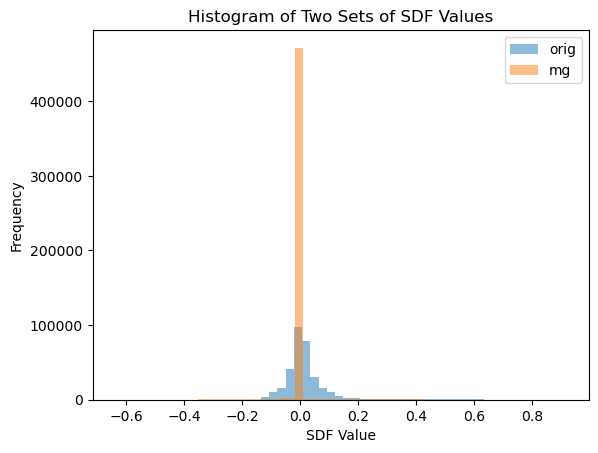

In [10]:
import matplotlib.pyplot as plt
plt.hist(sdf_values, bins=50, alpha=0.5, label='orig')
plt.hist(sdf_values1, bins=50, alpha=0.5, label='mg')
plt.title("Histogram of Two Sets of SDF Values")
plt.xlabel("SDF Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 对比重建和gt mesh结果

In [2]:
mesh_path_recon = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_pretrained/Reconstructions/1000/Meshes_train/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1.ply"
mesh_gt_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1/model_canonical_manifoldplus.obj"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/data/SdfSamples/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1.npz"

raw = np.load(sdf_path)
scale = raw['scale_mesh2sdf'] 
translation = raw['translation_mesh2sdf']

mesh_recon = mesh_load(mesh_path_recon)
mesh_gt = mesh_load(mesh_gt_path)

RESCALE=True

threshold = 0.005
with np.load(os.path.join(sdf_path)) as raw:
        # data = raw['pos']
        data0 = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data0[:, 0]
        y = data0[:, 1]
        z = data0[:, 2]
        sdf_values = data0[:, 3]
        
        if not RESCALE:
                x = x[np.abs(sdf_values)<threshold]
                y = y[np.abs(sdf_values)<threshold]
                z = z[np.abs(sdf_values)<threshold]
        else:
                x = x[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
                y = y[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
                z = z[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[
        mesh_recon,
        mesh_gt,
        trace], layout=layout)
fig.show()

NameError: name 'mesh_load' is not defined

# Vis GenSDF

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

import pandas as pd

import csv

import matplotlib.pyplot as plt

def clean_and_convert(lst):
    return np.array([float(x.replace('#', '').strip()) for x in lst])

def get_center_and_scale(csv_path):
    with open(csv_path,'r') as file:
        reader = csv.reader(file)
        for i,row in enumerate(reader):
            if row[0].startswith("#"):
                if i==0:
                    center = clean_and_convert(row)
                if i==1:
                    scale = clean_and_convert(row)
            else:
                break
    return center, scale

(array([2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0.,    0., 2500.,
           0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,    0.,
        2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,
           0.,    0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,
           0., 4900., 4900.,    0., 7400.,    0., 4900.,    0., 4900.,
           0., 7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,
           0., 4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,
           0., 4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0.,
        7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,    0.,
        4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,    0.,
        4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0., 7400.,
      

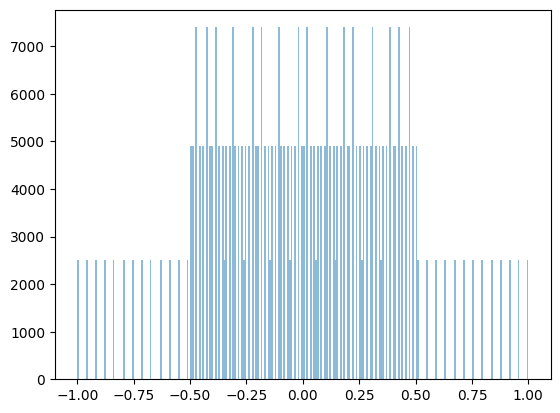

In [5]:
raw = pd.read_csv("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/data/grid_data/acronym/Couch/37cfcafe606611d81246538126da07a8/grid_gt.csv")
data = np.array(raw)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

# fig = go.Figure(data=[trace], layout=layout)
# fig.show()

plt.hist(x, bins=256, alpha=0.5, label='orig')

In [18]:
raw = pd.read_csv("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/data/grid_data/canonical_mesh_manifoldplus/04256520/1a4a8592046253ab5ff61a3a2a0e2484_scene0484_00_ins_1.csv",delimiter=",",comment="#")

data = np.array(raw)
data = data[::50]

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

# plt.hist(x, bins=256, alpha=0.5, label='orig')

In [ ]:
csv_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/data/canonical_mesh_manifoldplus/04256520/1a4a8592046253ab5ff61a3a2a0e2484_scene0484_00_ins_1.csv"

center, scale = get_center_and_scale(csv_path)

raw = pd.read_csv(csv_path,delimiter=",",comment="#")
data_sdf = np.array(raw)
data = data_sdf[::40,:3]

# data = (data + center) * scale

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

# plt.hist(z, bins=256, alpha=0.5, label='orig')

In [28]:
def get_center_and_scale(csv_path):
    def clean_and_convert(lst):
        return np.array([float(x.replace('#', '').strip()) for x in lst])
    with open(csv_path,'r') as file:
        reader = csv.reader(file)
        for i,row in enumerate(reader):
            if row[0].startswith("#"):
                if i==0:
                    center = clean_and_convert(row)
                if i==1:
                    scale = clean_and_convert(row)
            else:
                break
    return center, scale

In [30]:
print(center)
print(scale)

[ 0.00403836 -0.218371   -0.089923  ]
[2.73115]


# DDIT IoU

In [104]:
# import pyvista as pv
# import numpy as np

# def load_and_voxelize_mesh(file_path, voxel_size):
#     # Load mesh
#     mesh = pv.read(file_path)

#     # Create a voxel representation of the mesh
#     voxels = mesh.voxelized(voxel_size)

#     return voxels

# def compute_iou(voxel_mesh1, voxel_mesh2):
#     # Convert voxel grids to boolean arrays
#     grid1 = voxel_mesh1.to_array().astype(bool)
#     grid2 = voxel_mesh2.to_array().astype(bool)

#     # Calculate intersection and union
#     intersection = np.logical_and(grid1, grid2)
#     union = np.logical_or(grid1, grid2)

#     # Calculate IoU
#     iou = np.sum(intersection) / np.sum(union)
#     return iou

# # Set voxel size
# voxel_size = 1.0

# # Load and voxelize meshes
# voxel_mesh1 = load_and_voxelize_mesh('/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/165a78e3a2b705ef22c3a2386a9dfbe9_scene0230_00_ins_4.ply.ply', voxel_size)
# voxel_mesh2 = load_and_voxelize_mesh('/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/model_canonical_manifoldplus.obj', voxel_size)

# # Compute IoU
# iou = compute_iou(voxel_mesh1, voxel_mesh2)
# print(f"IoU: {iou}")


In [1]:
import open3d as o3d
import numpy as np

def normalize_mesh(mesh):
    # 将网格的重心平移到原点
    mesh.translate(-mesh.get_center())

    # 缩放网格，使其适应单位立方体
    max_bound = mesh.get_max_bound()
    min_bound = mesh.get_min_bound()
    max_size = max(max_bound - min_bound)
    mesh.scale(1 / max_size, center=mesh.get_center())

    return mesh

def iou_mesh(mesh_path1,mesh_path2, normalize=False):
    mesh1 = o3d.io.read_triangle_mesh(mesh_path1)
    voxel_grid1 = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh1, voxel_size=0.02)

    mesh2 = o3d.io.read_triangle_mesh(mesh_path2)
    voxel_grid2 = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh2, voxel_size=0.02)

    if normalize:
        mesh2 = normalize_mesh(mesh2)
        mesh1 = normalize_mesh(mesh1)

    voxels1 = np.array([voxel.grid_index for voxel in voxel_grid1.get_voxels()])
    voxels2 = np.array([voxel.grid_index for voxel in voxel_grid2.get_voxels()])

    # 将每行转换为字符串
    voxels1_str = np.array(["_".join(map(str, row)) for row in voxels1])
    voxels2_str = np.array(["_".join(map(str, row)) for row in voxels2])

    # 计算交集
    intersection_str = np.intersect1d(voxels1_str, voxels2_str)
    union_str = np.union1d(voxels1_str, voxels2_str)

    # 将字符串交集转换回整数数组
    intersection = np.array([list(map(int, v.split("_"))) for v in intersection_str])
    union = np.array([list(map(int, v.split("_"))) for v in union_str])

    print("交集的体素：")
    print(len(intersection))

    print("并集的体素：")
    print(len(union))
    
    return len(intersection)/len(union)

mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/69999/Meshes/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3.ply.ply"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3/model_canonical_manifoldplus.obj"

mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ShapeNet_manifoldplus/04256520/1a04dcce7027357ab540cc4083acfa57.obj"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ShapeNet_manifoldplus/04256520/1a4a8592046253ab5ff61a3a2a0e2484.obj"

iou_mesh(mesh_path1,mesh_path2)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
交集的体素：
517
并集的体素：
6721


0.07692307692307693

In [101]:
# mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/model_canonical_manifoldplus.obj"
# mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/165a78e3a2b705ef22c3a2386a9dfbe9_scene0230_00_ins_4.ply.ply"

mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/69999/Meshes/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3.ply.ply"
mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3/model_canonical_manifoldplus.obj"

mesh1 = o3d.io.read_triangle_mesh(mesh_path1)
mesh1 = normalize_mesh(mesh1)
voxel_grid1 = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh1, voxel_size=0.02)

mesh2 = o3d.io.read_triangle_mesh(mesh_path2)
mesh2 = normalize_mesh(mesh2)
voxel_grid2 = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh2, voxel_size=0.02)

voxels1 = np.array([voxel.grid_index for voxel in voxel_grid1.get_voxels()])
voxels2 = np.array([voxel.grid_index for voxel in voxel_grid2.get_voxels()])

# 将每行转换为字符串
voxels1_str = np.array(["_".join(map(str, row)) for row in voxels1])
voxels2_str = np.array(["_".join(map(str, row)) for row in voxels2])

# 计算交集
intersection_str = np.intersect1d(voxels1_str, voxels2_str)
union_str = np.union1d(voxels1_str, voxels2_str)

# 将字符串交集转换回整数数组
intersection = np.array([list(map(int, v.split("_"))) for v in intersection_str])
union = np.array([list(map(int, v.split("_"))) for v in union_str])

print("交集的体素：")
print(len(intersection))

print("并集的体素：")
print(len(union))

print("IoU: ")
print(len(intersection)/len(union))

交集的体素：
10674
并集的体素：
63379
IoU: 
0.1684154057337604


# 可视化补全结果

In [5]:
from dataloader.dataset_ScanARCW import MyScanARCWDataset
import json
import trimesh
import numpy as np
# import quaternion
import os
import open3d as o3d

import plotly.graph_objs as go


dataset_train = MyScanARCWDataset(latent_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_mypretrainedb24_b24/LatentCodes/train/2000/canonical_mesh_manifoldplus/04256520",
                            pcd_path_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA",
                            json_file_root="/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA/ScanARCW/json_files_v5",
                            sdf_file_root="/home/wiss/lhao/binghui_DONTDELETE_ME/DDIT/DATA/ScanARCW_new/ScanARCW/sdf_samples/04256520",
                            pc_size=128,
                            length=-1,
                            times=1,
                            pre_load=False,
                            use_sdf=True,
                            conditional=True
                            )

vis_data = []

def normalize_vet(vertices):
    # 计算重心
    center = np.mean(vertices, axis=0)

    # 平移网格使重心位于原点
    vertices_centered = vertices - center

    # 缩放网格
    max_extent = np.max(np.abs(vertices_centered))
    vertices_normalized = vertices_centered / max_extent

    return vertices_normalized

def mesh_load(mesh_path, scale_c2w=None, rotation_quat_wxyz=None, translation_c2w=None,mesh_name=None, normalize=False, opacity=0.7):
    # 从文件加载网格数据
    file_suffix = mesh_path.split(".")[-1]
    if file_suffix == "obj":
        with open(mesh_path, 'r') as file:
            lines = file.readlines()

        vertices = []
        faces = []

        for line in lines:
            if line.startswith('v '):
                vertex = line.split()[1:]
                vertices.append([float(vertex[0]), float(vertex[1]), float(vertex[2])])
            elif line.startswith('f '):
                face = line.split()[1:]
                face_indices = [int(idx.split('/')[0]) - 1 for idx in face]
                faces.append(face_indices)

        if normalize:
            vertices = normalize_vet(np.asarray(vertices))

        mesh = go.Mesh3d(x=[v[0] for v in vertices], y=[v[1] for v in vertices], z=[v[2] for v in vertices],
                        i=[f[0] for f in faces], j=[f[1] for f in faces], k=[f[2] for f in faces], name=mesh_name, opacity=opacity)
        return mesh

    elif file_suffix == "ply":
        from plyfile import PlyData

        # 从PLY文件加载网格数据
        plydata = PlyData.read(mesh_path)

        # 提取顶点坐标
        vertices = np.array([list(vertex) for vertex in plydata['vertex'].data])

        if normalize:
            vertices = normalize_vet(np.asarray(vertices))

        # 提取面数据
        faces = np.array(plydata['face'].data['vertex_indices'])
        faces = np.array([list(row) for row in faces])

        # 创建网格图形对象
        mesh = go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], i=faces[:, 0], j=faces[:, 1], k=faces[:, 2], name=mesh_name, opacity=opacity)
        return mesh

def mesh_apply_rts(mesh, rotation_mat_c2w=np.eye(3), translation_c2w=np.zeros(3), scale_c2w=np.ones(1), mesh_name=None, mesh_color=None):
    if type(mesh2) is go.Mesh3d:
        vertices = np.asarray([mesh2.x,mesh2.y,mesh2.z]).T
        faces = np.asarray([mesh2.i,mesh2.j,mesh2.k]).T
    else:
        vertices = np.array(mesh.x)
        faces = np.array(mesh.faces)
    
    vertices = vertices * scale_c2w

    if rotation_mat_c2w is None:
    # Apply rotation
    # pcd_meshcoord = (np.linalg.inv(gt_rotation_mat_c2w) @ (pcd_world - gt_translation_c2w[np.newaxis, :]).T).T
        transformed_vertices = vertices
    else:
        transformed_vertices = (rotation_mat_c2w @ vertices.T).T + translation_c2w[np.newaxis, :]
    
    x, y, z = transformed_vertices.T  # Transposed for easier unpacking
    i, j, k = faces.T  # Unpack faces

    if mesh_color is None:
        mesh_color = "rgba(244,22,100,0.5)"

    mesh_transformed = go.Mesh3d(
        x=x, y=y, z=z,
        i=i, j=j, k=k,
        opacity=0.5,
        color=mesh_color,
        name=mesh_name
    )
    return mesh_transformed

# mesh1 = mesh_load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/165a78e3a2b705ef22c3a2386a9dfbe9_scene0230_00_ins_4.ply.ply")
# mesh2 = mesh_load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/model_canonical_manifoldplus.obj")
# pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/165a78e3a2b705ef22c3a2386a9dfbe9_scene0230_00_ins_4.pth.pcd"

## 尺度不对？？？？
mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/69999/Meshes/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3.ply.ply"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3/model_canonical_manifoldplus.obj"
pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/pcd/2abe8d5b5d29ff52f7628281ecb18112_scene0165_01_ins_3.pth.pcd"

## 弯沙发，实际为方形沙发
mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/49999/Meshes/2ee577ae974272dc9faa444e7f5fd692_scene0244_01_ins_3.ply.ply"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/2ee577ae974272dc9faa444e7f5fd692_scene0244_01_ins_3/model_canonical_manifoldplus.obj"
pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/pcd/2ee577ae974272dc9faa444e7f5fd692_scene0244_01_ins_3.pth.pcd"

## 高圆沙发, 其实为方沙发
mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/69999/Meshes/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10.ply.ply"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10/model_canonical_manifoldplus.obj"
pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/pcd/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10.pth.pcd"

## 高圆沙发, 其实为方沙发
mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/69999/Meshes/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10.ply.ply"
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10/model_canonical_manifoldplus.obj"
pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/pcd/26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10.pth.pcd"
# pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/segmented_pcd/scene0529_00/ins_10_sofa_26d36969b0ef62b1c2c449c0c0579ec3.pcd"

## good
lat = "330d44833e1b4b168b38796afe7ee552_scene0582_01_ins_1"
ckpt = "49999"

## good
lat = "337f25da3cdae83bc7660a81296c2300_scene0213_00_ins_2"
ckpt = "49999"

## bad L形沙发
lat = "354c37c168778a0bd4830313df3656b_scene0587_00_ins_3"
ckpt = "49999"
ckpt = "69999"

## 歪了？L型沙发学成了床
lat = "354c37c168778a0bd4830313df3656b_scene0647_01_ins_7"
ckpt = "49999"

lat = "377fceb1500e6452d9651cd1d591d64d_scene0141_01_ins_13"

## bad
lat = "377fceb1500e6452d9651cd1d591d64d_scene0651_02_ins_13"

## good 单人沙发
lat = "1230d31e3a6cbf309cd431573238602d_scene0059_00_ins_2"

## good
lat = "1824d5cfb7472fcf9d5cfc3a8d7af21d_scene0203_02_ins_3"

## good
lat = "288837a47f55c0e9d8d964adc0b6502a_scene0192_01_ins_1"

lat = "389751629226a005cbde89e0c48a01bf_scene0362_03_ins_9"

## 高圆沙发, 其实为方沙发
lat = "26d36969b0ef62b1c2c449c0c0579ec3_scene0529_00_ins_10"
ckpt = "49999"


mesh_path1 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/recon/{}/Meshes/{}.ply.ply".format(ckpt,lat)
mesh_path2 = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/DeepImplicitTemplates/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/{}/model_canonical_manifoldplus.obj".format(lat)
pcd_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/config/stage2_diff_cond_scanarcw/pcd/{}.pth.pcd".format(lat)

initializing latent_paths and checking corresponding segmented pcd...


  1%|          | 5/456 [00:00<00:13, 33.88it/s]

scene0381_02
2
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2/model_canonical.obj', 'gt_scale_c2w': [1.393733, 1.204592, 1.436368], 'gt_translation_c2w': [-0.756782, -2.663944, 1.26873], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'category_name': 'sofa', 'scale_sdf2mesh': [0.6430880888014722], 'translation_sdf2mesh': [0.0034843349999999903, 0.00656502500000001, 0.032749190000000004], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_2.npz', 'gt_rotation_quat_wxyz_c2w': [0.9770607212884037, 0.0, -0.21296090466417603, 0.0]}
scene0381_02
3
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/1230d31e3a6cbf309cd431573238602d_scene0381_02_ins_3/model_canonical.obj', 'gt_scale_c2w': [1.333796, 1.207438, 1.493714], 'gt_translation_c2w': [0.147717, -2.663103, -0.968653], 'category_id': '04256520', 'cad_id': '1230d31e3a6cbf309cd431573238602d', 'cat

 28%|██▊       | 126/456 [00:01<00:03, 92.87it/s]

scene0432_01
3
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/4521ce028e5009811866a0bc19f46a1d_scene0432_01_ins_3/model_canonical.obj', 'gt_scale_c2w': [1.049322, 1.36486, 1.124545], 'gt_translation_c2w': [-0.51573, -0.39677599999999996, 1.175569], 'category_id': '04256520', 'cad_id': '4521ce028e5009811866a0bc19f46a1d', 'category_name': 'sofa', 'scale_sdf2mesh': [0.5863736817663469], 'translation_sdf2mesh': [0.0, 0.023816805, -0.05639593], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/4521ce028e5009811866a0bc19f46a1d_scene0432_01_ins_3.npz', 'gt_rotation_quat_wxyz_c2w': [0.9998299940272578, 0.0, -0.018438629109934504, 0.0]}
scene0432_01
4
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/4521ce028e5009811866a0bc19f46a1d_scene0432_01_ins_4/model_canonical.obj', 'gt_scale_c2w': [1.015357, 1.401886, 1.036007], 'gt_translation_c2w': [0.669774, -0.387368, 1.024775], 'category_id': '04256520', 'cad_id': '4521ce028e5009811866a0bc19f46a1d', 'category_name': 'sofa', 'sca

 49%|████▉     | 223/456 [00:02<00:01, 140.61it/s]

scene0381_02
4
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4/model_canonical.obj', 'gt_scale_c2w': [1.486233, 2.218334, 1.806494], 'gt_translation_c2w': [0.428396, -2.669162, 1.295171], 'category_id': '04256520', 'cad_id': '7ae657b39aa2be68ccd1bcd57588acf8', 'category_name': 'sofa', 'scale_sdf2mesh': [0.8255174041389984], 'translation_sdf2mesh': [0.10284732499999993, 0.05091076500000004, 0.08517618999999998], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/7ae657b39aa2be68ccd1bcd57588acf8_scene0381_02_ins_4.npz', 'gt_rotation_quat_wxyz_c2w': [0.9763542956793265, 0.0, 0.21617652349070252, 0.0]}


 80%|████████  | 366/456 [00:03<00:00, 260.41it/s]

scene0381_00
5
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5/model_canonical.obj', 'gt_scale_c2w': [0.628837, 1.571009, 2.014241], 'gt_translation_c2w': [0.453786, -2.024369, -1.359402], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 'category_name': 'sofa', 'scale_sdf2mesh': [0.45044673229578547], 'translation_sdf2mesh': [-0.0016978600000000024, -0.07273771500000002, -0.002920649999999971], 'gt_sdf': 'ScanARCW/sdf_samples/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_5.npz', 'gt_rotation_quat_wxyz_c2w': [0.9994293142937329, 0.0, 0.0337793684126691, 0.0]}
scene0381_00
6
{'gt_scaled_canonical_mesh': 'ScanARCW/canonical_mesh/04256520/c1b8d982d97e337f19fb4103277a6b93_scene0381_00_ins_6/model_canonical.obj', 'gt_scale_c2w': [0.641158, 1.557385, 1.969344], 'gt_translation_c2w': [-0.548681, -2.026825, -1.522597], 'category_id': '04256520', 'cad_id': 'c1b8d982d97e337f19fb4103277a6b93', 

100%|██████████| 456/456 [00:03<00:00, 131.65it/s]


In [ ]:
latent_name = os.path.basename(mesh_path1).split(".")[0]+".pth"
transformations = dataset_train.transformations_dict[latent_name]
scale_mesh2sdf = 1/transformations["scale_sdf2mesh"]
translation_mesh2sdf = -transformations["translation_sdf2mesh"]

mesh1 = mesh_load(mesh_path1, normalize=False, mesh_name="pred")
mesh2 = mesh_load(mesh_path2, normalize=False, mesh_name="gt")
mesh2 = mesh_apply_rts(mesh2, translation_c2w=translation_mesh2sdf)
mesh2 = mesh_apply_rts(mesh2, scale_c2w=scale_mesh2sdf)

pcd = o3d.io.read_point_cloud(pcd_path)
points = np.asarray(pcd.points)
trace = go.Scatter3d(
    x=points[:, 0],  # X 坐标
    y=points[:, 1],  # Y 坐标
    z=points[:, 2],  # Z 坐标
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.8
    )
)

vis_data = [mesh1,mesh2,trace]
layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)
fig = go.Figure(data=vis_data, layout=layout)
fig.show()